# Common Distribution Functions in Tensorflow

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn

distributions = tf.contrib.distributions
%matplotlib inline

In [43]:
g = tf.Graph()
with g.as_default():
    uniform = distributions.Uniform(0.0, 1.0)
    
    # Degree of Freedoms
    student = distributions.StudentT(df=4)
    
    init_op = tf.global_variables_initializer()

In [75]:
def plot_distribution(prob_builder, sample_count=1000, bin_count=40):
    g = tf.Graph()
    with g.as_default():
        distribution = prob_builder()
        
        samples = distribution.sample(sample_count)
        
        x = tf.linspace(tf.reduce_min(samples), tf.reduce_max(samples), sample_count)
        
        pdf = distribution.pdf(x)
        init_op = tf.global_variables_initializer()

    with tf.Session(graph=g) as sess:
        _, samples_np, pdf_np, x_np = sess.run([init_op, samples, pdf, x])
    
    plt.hist(samples_np, bin_count, normed=True)   
    plt.plot(x_np, pdf_np, 'r-')

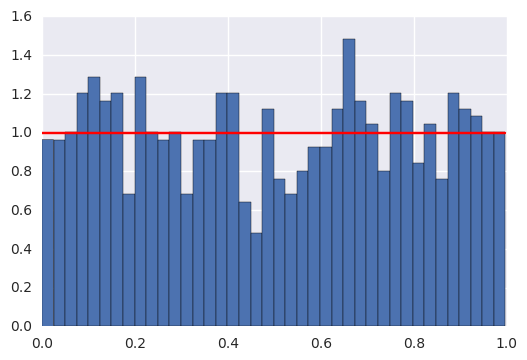

In [76]:
plot_distribution(lambda : distributions.Uniform(0.0, 1.0) , 1000)

## Gaussian 

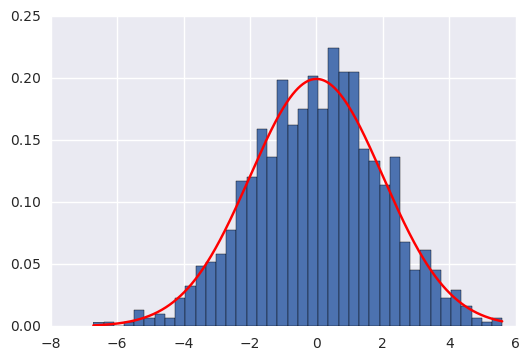

In [77]:
plot_distribution(lambda: distributions.Normal(0.0, 2.0), 1000)

## Student-T

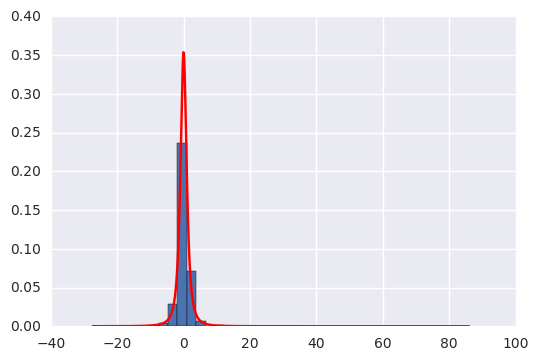

In [78]:
plot_distribution(lambda : distributions.StudentT(df=2.0, mu=0.0, sigma=1.0) , 1000)

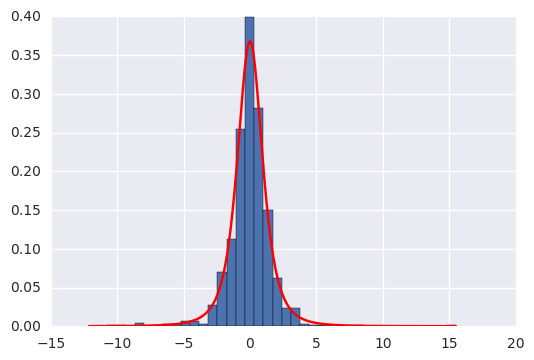

In [82]:
plot_distribution(lambda : distributions.StudentT(df=3.0, mu=0.0, sigma=1.0) , 1000)

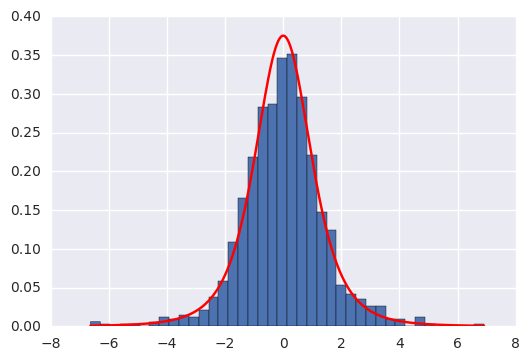

In [80]:
plot_distribution(lambda : distributions.StudentT(df=4.0, mu=0.0, sigma=1.0) , 1000)

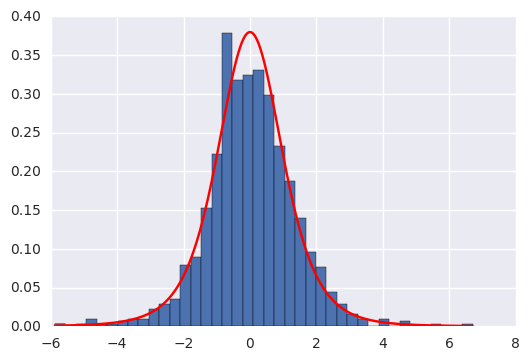

In [81]:
plot_distribution(lambda : distributions.StudentT(df=5.0, mu=0.0, sigma=1.0) , 1000)